# Sen Heng Web Scrapping Project

## Problem Statement: To scrap the product details in Sen Heng Website under the category of Home Entertainment and suggest which items should be sold more or be sold less. 

### Major Assumption: Since number of items sold for each product is not available, it is assumed that every buyer has left a review for their product. Hence, number of items sold is equal to number of reviews.

In [106]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#baseurl is the website from which the data will be scrapped.
baseurl = 'https://www.senheng.com.my/all-products/home-entertainment.html' 
head = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

#To extract the url for each product and store them in a list
productlinks = []
for x in range(1,5):
    r = requests.get(f'https://www.senheng.com.my/all-products/home-entertainment.html?p={x}')
    soup = BeautifulSoup(r.content,'lxml')
    productlist = soup.find_all('div', class_ ='product-item-details')
    

    for item in productlist:
        for link in item.find_all('a', href=True):
            productlinks.append(link['href'])
        
#To create a dictionary of required features for each product
itemList = [] 
for link in productlinks:
    r = requests.get(link, headers = head)
    substring = "#customer-reviews"
    if substring not in link:
        soup = BeautifulSoup(r.content, 'lxml')
        print(link)
        item_name = (soup.find('span' ,class_ = 'base').text.strip())
        
        try: 
            actual_price = (soup.find('span' ,class_ = 'old-price').text.strip())
        except:
            actual_price = (soup.find('span' ,class_ = 'price').text.strip())
            
        try:
            discount_price = (soup.find('span' ,class_ = 'special-price').text.strip())
        except:
            discount_price = actual_price

        rating = (soup.find('div' ,class_ = 'rating-result').text.strip())
        type_Item = (soup.find('li', class_ = 'item 3').text.strip())
        substring2 = "Warranty"
        warranty = (soup.find('div', class_ = 'value').text.strip())
        if substring2 not in warranty:
            warranty = "No Warranty"
        try:
            mon_Payment = (soup.find('span', class_ = 'sub-code').text.strip())
        except:
            mon_Payment = "0"
        
        try:
            num_Reviews = (soup.find('span', class_ = 'review-number').text.strip())
        except:
            num_Reviews = "0"
            
        brand = (soup.find('td' ,class_ = 'col data').text.strip())

        item = {
            'Item_Name' : item_name,
            'Category' : type_Item,
            'Brand' : brand,
            'Discounted_Price' : discount_price,
            'Actual_Price' : actual_price,
            'Rating' : rating,
            'Num_Reviews' : num_Reviews,
            'Warranty' : warranty,
            'Mon_Payment' : mon_Payment
        }

        itemList.append(item)
        print('Saving: ', item["Item_Name"])

#To convert the dictionary into a DataFrame
df = pd.DataFrame(itemList)
    

https://www.senheng.com.my/haier-50-inch-uhd-tv-le50b9600u.html
Saving:  Haier 50-Inch UHD TV LE50B9600U
https://www.senheng.com.my/haier-32-inch-full-hd-led-tv-le32b9600t.html
Saving:  Haier 32-Inch Full HD LED TV LE32B9600T
https://www.senheng.com.my/sony-wf-1000xm3-wireless-noise-cancelling-headphones-black.html
Saving:  Sony WF-1000XM3 Wireless Noise Cancelling Headphones Black
https://www.senheng.com.my/haier-50-inch-uhd-android-tv-le50u6900ug.html
Saving:  Haier 50-Inch UHD Android TV LE50U6900UG
https://www.senheng.com.my/huawei-freelace-amber-sunrise-hua-cm70-sunrise.html
Saving:  HUAWEI FreeLace Amber Sunrise
https://www.senheng.com.my/sharp-60-inch-4k-uhd-tv-wide-colour-dvb-t2x4-master-engine-pro-ii-shp-4tc60ch1x.html
Saving:  Sharp 60 Inch 4K UHD TV Wide Colour DVB-T2X4 Master Engine Pro II SHP-4TC60CH1X
https://www.senheng.com.my/sony-43-inch-x75h-4k-ultra-hd-hdr-smart-tv-sny-kd43x7500h.html
Saving:  Sony 43 Inch X75H 4K Ultra HD HDR Smart TV SNY-KD43X7500H
https://www.senh

# Data Cleaning

## To remove duplicates products from the dataset

In [107]:
df.drop_duplicates(subset ="Item_Name", keep = 'first', inplace = True) 

### To extract only digits from the 'Num_Reviews' column

In [108]:
df[df['Num_Reviews']=='Displaying 1-10 of 15 reviews']

,Item_Name,Category,Brand,Discounted_Price,Actual_Price,Rating,Num_Reviews,Warranty,Mon_Payment
58,LG UN73 Series 55” 4K Active HDR Smart UHD TV ...,TV,LG,"RM2,799.00","RM3,099.00",100% of 100,Displaying 1-10 of 15 reviews,2-Years Warranty,116.63/month


In [109]:
df['Num_Reviews'] = df['Num_Reviews'].str.extract('(\d+)', expand=False)
df["Num_Reviews"][58] = '15'
df["Num_Reviews"] = df["Num_Reviews"].astype('int')

df['Actual_Price'] = df['Actual_Price'].str.replace(',', '')
df['Actual_Price'] = df['Actual_Price'].str.replace('RM', '')
df['Actual_Price'] = df['Actual_Price'].astype('float')

df['Discounted_Price'] = df['Discounted_Price'].str.replace(',', '')
df['Discounted_Price'] = df['Discounted_Price'].str.replace('RM', '')
df['Discounted_Price'] = df['Discounted_Price'].astype('float')

df["Rating"] = df["Rating"].str.split("%", n = 1, expand = True)
df["Rating"].replace('Excellent\n\n5', 100, inplace=True)
df["Rating"] = df["Rating"].astype('float')

df['Mon_Payment'] = df['Mon_Payment'].str.replace(',', '')
df["Mon_Payment"] = df["Mon_Payment"].str.split("/", n = 1, expand = True)
df["Mon_Payment"] = df["Mon_Payment"].astype('float')

df["Brand"].replace("-- Please Select --", "No brand", inplace=True)
df["Brand"].replace("89.36", "Panasonic", inplace=True)
df["Brand"].replace("96.8", "Panasonic", inplace=True)
df["Brand"].replace("144.6", "Philips", inplace=True)

df.head()

,Item_Name,Category,Brand,Discounted_Price,Actual_Price,Rating,Num_Reviews,Warranty,Mon_Payment
0,Haier 50-Inch UHD TV LE50B9600U,TV,Haier,1599.0,2059.0,80.0,1,2-Years Warranty,66.63
1,Haier 32-Inch Full HD LED TV LE32B9600T,TV,Haier,699.0,809.0,0.0,0,2-Years Warranty,58.25
2,Sony WF-1000XM3 Wireless Noise Cancelling Head...,Wearables,Sony,799.0,949.0,0.0,0,No Warranty,66.58
3,Haier 50-Inch UHD Android TV LE50U6900UG,TV,Haier,1649.0,2599.0,0.0,0,2-Years Warranty,68.71
4,HUAWEI FreeLace Amber Sunrise,Audio,Huawei,369.0,369.0,0.0,0,1-Year Warranty,0.00


In [110]:
df.sort_values(by='Num_Reviews', ascending=False)

,Item_Name,Category,Brand,Discounted_Price,Actual_Price,Rating,Num_Reviews,Warranty,Mon_Payment
58,LG UN73 Series 55” 4K Active HDR Smart UHD TV ...,TV,LG,2799.0,3099.0,100.0,15,2-Years Warranty,116.63
26,Samsung 50 Inch TU8500 Crystal UHD 4K Smart TV...,TV,Samsung,2449.0,2699.0,87.0,6,2-Years Warranty,102.04
6,Sony 43 Inch X75H 4K Ultra HD HDR Smart TV SNY...,TV,Sony,1888.0,2199.0,100.0,6,2-Years Warranty,78.67
134,LG UN74 Series 55” 4K Active HDR Smart UHD TV ...,TV,LG,3099.0,3299.0,100.0,5,2-Years Warranty,86.08
160,Sony V21 High-Power Audio System with Bluetoot...,Audio,Sony,799.0,899.0,100.0,5,1-Year Warranty,66.58
...,...,...,...,...,...,...,...,...,...
42,Sharp 42-Inch Full HD TV 2TC42BD1X,TV,Sharp,949.0,1499.0,0.0,0,2-Years Warranty,79.08
41,Belkin BOOSTUP 2-Ports USB Swivel Charger F8M1...,Accessories,Belkin,146.0,146.0,0.0,0,2-Years Warranty,0.00
40,Riversong Melody T+ (Type-C),Audio,No brand,54.0,54.0,0.0,0,1-Year Warranty,0.00
39,Samsung 55 Inch The Frame QLED 4K Smart Lifest...,TV,Samsung,4999.0,6499.0,0.0,0,2-Years Warranty,138.86


## Feature Engineering

In [111]:
df['Discount'] = ((df['Actual_Price'] - df['Discounted_Price']) / df['Actual_Price'] * 100).round(decimals=2)

## Exploratory Data Analysis (EDA)


In [112]:
import matplotlib.pyplot as plt

In [113]:
df['Category'].unique()

array(['TV', 'Wearables', 'Audio', 'Accessories', 'DVD Players',
       'Mobile Accessories'], dtype=object)

In [114]:
df_TV = df[df['Category']=='TV']
df_Wear = df[df['Category']=='Wearables']
df_Aud = df[df['Category']=='Audio']
df_Acc = df[df['Category']=='Accessories']
df_DVD = df[df['Category']=='DVD Players']
df_Mob = df[df['Category']=='Mobile Accessories']

In [115]:
#Subsetting unsold products
df_Unsold = df[df.Num_Reviews == 0.0]

#Subsetting sold products
df_Sold = df[df['Num_Reviews']>0]

In [116]:
df_Sold.sort_values(by='Num_Reviews', ascending=False).head()

,Item_Name,Category,Brand,Discounted_Price,Actual_Price,Rating,Num_Reviews,Warranty,Mon_Payment,Discount
58,LG UN73 Series 55” 4K Active HDR Smart UHD TV ...,TV,LG,2799.0,3099.0,100.0,15,2-Years Warranty,116.63,9.68
26,Samsung 50 Inch TU8500 Crystal UHD 4K Smart TV...,TV,Samsung,2449.0,2699.0,87.0,6,2-Years Warranty,102.04,9.26
6,Sony 43 Inch X75H 4K Ultra HD HDR Smart TV SNY...,TV,Sony,1888.0,2199.0,100.0,6,2-Years Warranty,78.67,14.14
11,LG UN73 Series 65” 4K Active HDR Smart UHD TV ...,TV,LG,3599.0,4449.0,100.0,5,2-Years Warranty,99.97,19.11
160,Sony V21 High-Power Audio System with Bluetoot...,Audio,Sony,799.0,899.0,100.0,5,1-Year Warranty,66.58,11.12


Text(0, 0.5, 'Number of Products Sold')

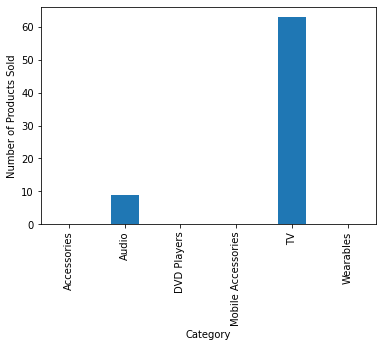

In [117]:
df_Num_Reviews = df.groupby(['Category'])['Num_Reviews'].sum()
df_Num_Reviews.plot.bar().set_ylabel('Number of Products Sold')

### It can be seen from the plot above that only Audio and TV products are sold through the Sen Heng website. Thus, products from these two categories can be more emphasized/highlighted in Sen Heng's website. More options from these two categories can be provided to propective customers.

Text(0, 0.5, 'Number of Products Sold')

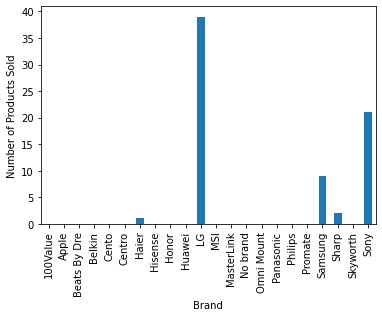

In [118]:
df_Brand = df.groupby(['Brand'])['Num_Reviews'].sum()
df_Brand.plot.bar().set_ylabel('Number of Products Sold')

### From the plot above, it is evident that all but LG, Sony, Samsung, Sharp and Haier are not very much popular with the customers. Thus, resources spent to soure out products from the unpopular brands can be eliminated and those resources can be redirected to procure quality products from most popular brands such as LG and Sony.

Text(0, 0.5, 'Mean Discount of Sold Products (%)')

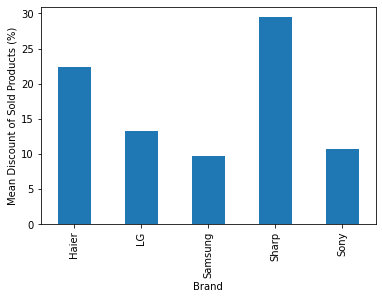

In [119]:
df_Sold.groupby(['Brand'])['Discount'].mean().plot.bar().set_ylabel('Mean Discount of Sold Products (%)')

### This plot above display the average discount of sold products in each brand. This gives an idea of how much discount to provide in the future for unsold products in those respective brands.

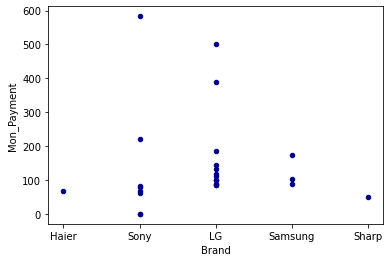

In [120]:
df_Sold.plot.scatter(x='Brand',y='Mon_Payment', c='DarkBlue')

### It is assumed that all the customers have bought the products thorugh monthly installment. Hence, we can say that products with a monthly payment of lesser than RM 200/per month has attracted more customers. So, I would suggest the company to focus on products with monthly installement payment below RM 200.